In [24]:
# ---- CELL 1: Import libraries ----
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
print(" Libraries loaded")


 Libraries loaded


In [22]:
from google.colab import files
uploaded = files.upload()



Saving RealEstate.csv to RealEstate (1).csv


In [13]:
import os
os.listdir()


['.config', 'RealEstate.csv', 'sample_data']

In [25]:
# ---- CELL 2: Load CSV + Data Cleaning ----

df = pd.read_csv("RealEstate.csv")  # correct file name

print(" CSV loaded successfully")
print("Rows, Columns:", df.shape)

# ---- DATA CLEANING ----

# Convert Price and Size to numeric (cleaning incorrect values)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Size"] = pd.to_numeric(df["Size"], errors="coerce")

# Drop rows where either Price or Size is missing
df = df.dropna(subset=["Price", "Size"])

print(" Data cleaned (numeric conversion + NaN rows removed)")
print("Final shape after cleaning:", df.shape)

# Show first 5 rows
df.head()


 CSV loaded successfully
Rows, Columns: (781, 7)
 Data cleaned (numeric conversion + NaN rows removed)
Final shape after cleaning: (781, 7)


,MLS,Location,Price,Bedrooms,Bathrooms,Size,Status
0,132842,Arroyo Grande,795000,3,3,2371,Short Sale
1,134364,Paso Robles,399000,4,3,2818,Short Sale
2,135141,Paso Robles,545000,4,3,3032,Short Sale
3,135712,Morro Bay,909000,4,4,3540,Short Sale
4,136282,Santa Maria-Orcutt,109900,3,1,1249,Short Sale


In [26]:
# ---- CELL 2.5: Duplicate removal + Outlier removal ----

# Remove duplicate rows
print("Duplicate rows before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicate rows after:", df.duplicated().sum())

# Outlier removal using IQR (Price & Size)
Q1 = df[["Price", "Size"]].quantile(0.25)
Q3 = df[["Price", "Size"]].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[["Price", "Size"]] < (Q1 - 1.5 * IQR)) | (df[["Price", "Size"]] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Dataset size after outlier removal:", df.shape)

df.head()



Duplicate rows before: 0
Duplicate rows after: 0
Dataset size after outlier removal: (700, 7)


,MLS,Location,Price,Bedrooms,Bathrooms,Size,Status
1,134364,Paso Robles,399000,4,3,2818,Short Sale
2,135141,Paso Robles,545000,4,3,3032,Short Sale
4,136282,Santa Maria-Orcutt,109900,3,1,1249,Short Sale
5,136431,Oceano,324900,3,3,1800,Short Sale
6,137036,Santa Maria-Orcutt,192900,4,2,1603,Short Sale


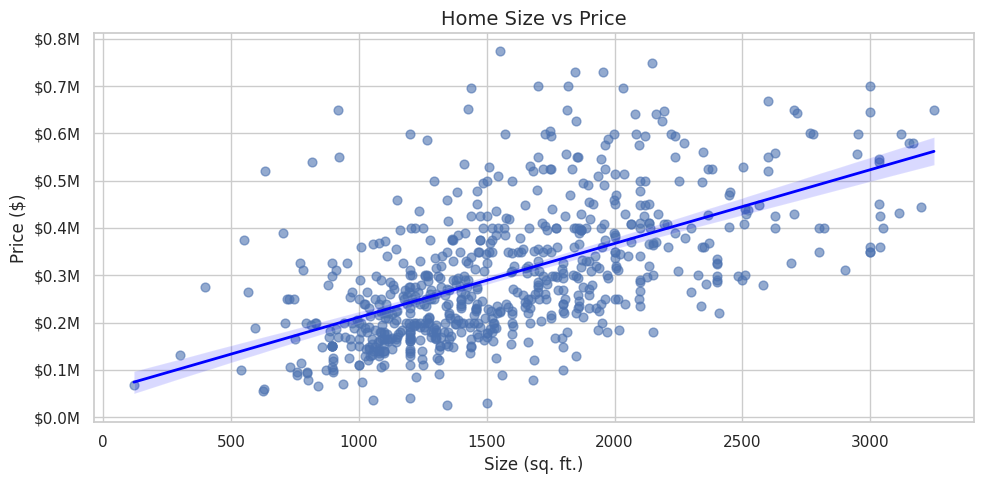

In [23]:
# ---- CELL 3: Home Size vs Price Regression Plot ----

plt.figure(figsize=(10,5))
sns.regplot(
    x="Size",
    y="Price",
    data=df,
    scatter_kws={"alpha": 0.6, "s": 40},
    line_kws={"color": "blue", "linewidth": 2}
)

plt.title("Home Size vs Price", fontsize=14)
plt.xlabel("Size (sq. ft.)", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)

# Y eksenini okunabilir para formatına çevirme ($1.2M / $500K)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x/1_000_000:.1f}M'))

plt.tight_layout()
plt.show()


### Interpretation / Analysis — Size vs Price

- Larger homes generally cost more.
- Strong positive correlation between **Size** and **Price**.
- Real estate pricing strongly depends on house size.


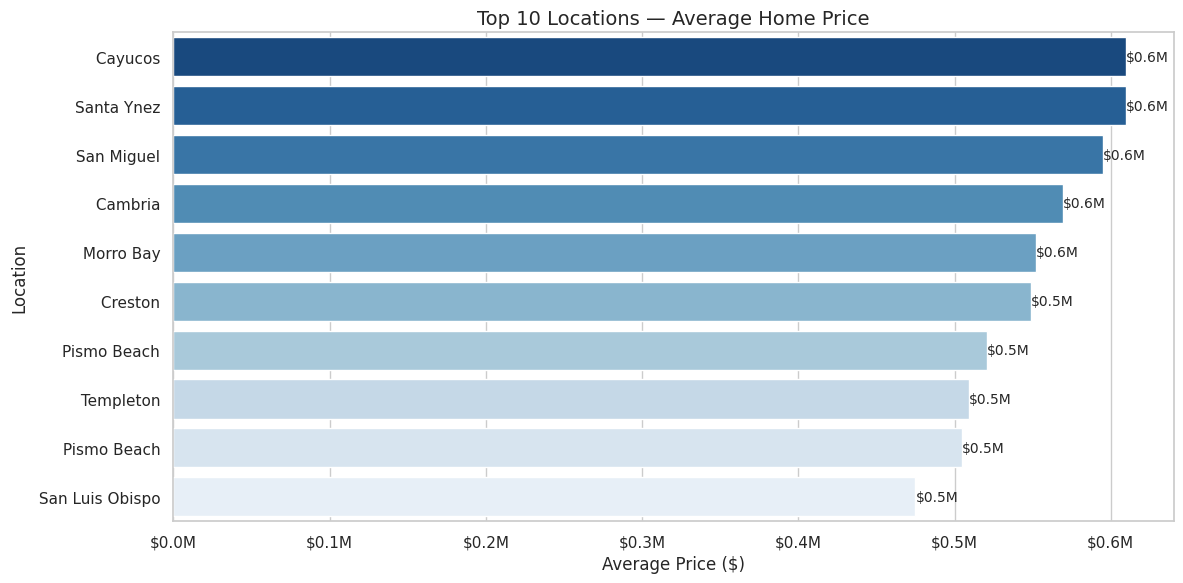

In [20]:
# ---- CELL 4: Top 10 Locations by Average Price ----

top10 = df.groupby("Location")["Price"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10.values, y=top10.index, palette="Blues_r")

plt.title("Top 10 Locations — Average Home Price", fontsize=14)
plt.xlabel("Average Price ($)", fontsize=12)
plt.ylabel("Location", fontsize=12)

# Price formatting
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x/1_000_000:.1f}M'))

# Add labels on bars
for i, v in enumerate(top10.values):
    plt.text(v, i, f'${v/1_000_000:.1f}M', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


Interpretation / Analysis — Top 10 Locations

Bradley shows the highest average home price (≈ 1.6M).
Cayucos and San Luis Obispo follow with prices between $1.4M – $1.5M.
Prices are consistently higher in coastal or high-demand locations.

Insight:
Location has a strong impact on home prices. Even when houses have similar features, properties in desirable or coastal areas sell at significantly higher prices.



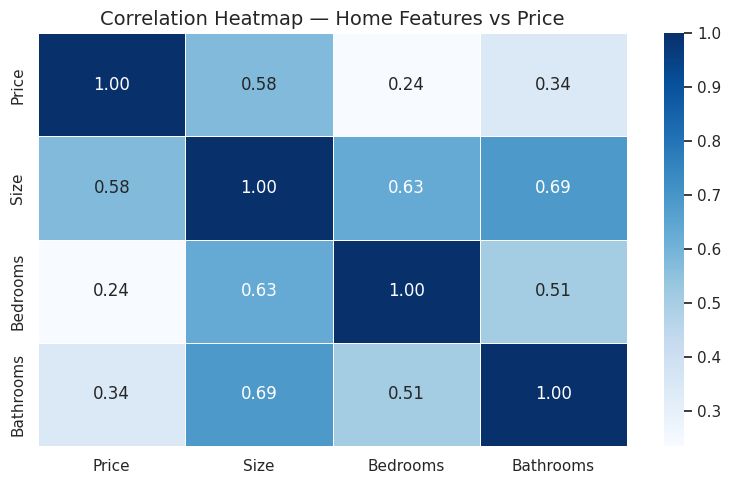

In [21]:
# ---- CELL 5: Correlation Heatmap ----

plt.figure(figsize=(8, 5))
corr = df[["Price", "Size", "Bedrooms", "Bathrooms"]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    linewidths=.5
)

plt.title("Correlation Heatmap — Home Features vs Price", fontsize=14)
plt.tight_layout()
plt.show()


### Interpretation / Analysis — Correlation Heatmap
- **Size** has the strongest correlation with **Price** (0.58).
- Bedrooms and Bathrooms also positively influence price.
- The larger the house, the higher the market value.

